### Assignment 1

### Question 1

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


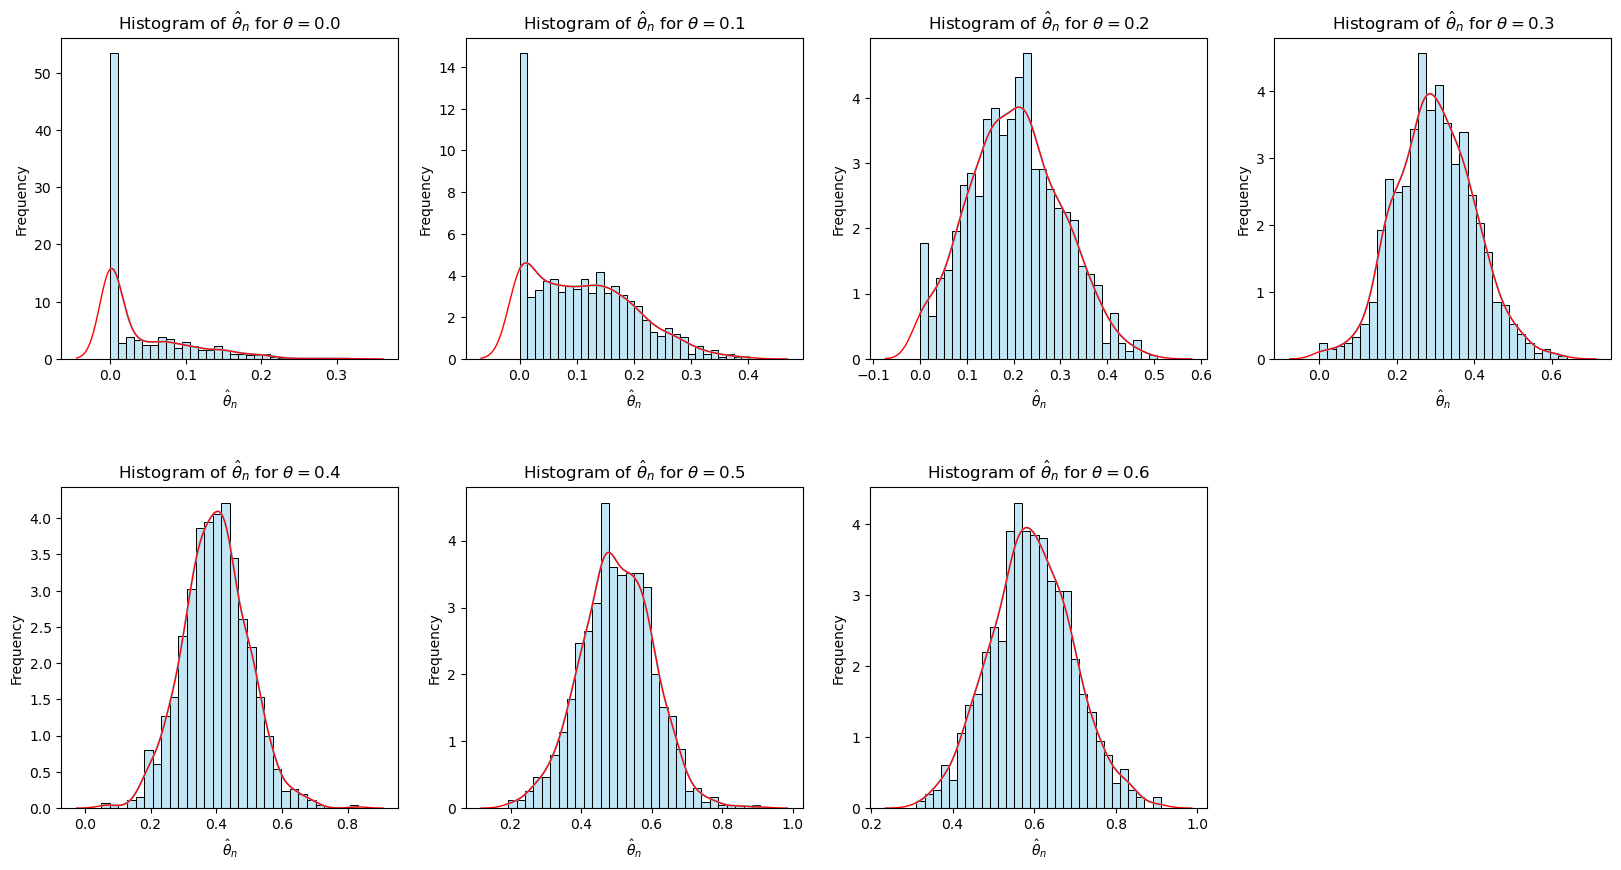

Theta = 0.0: Mean of estimates = 0.0402, Std Dev = 0.0595
Theta = 0.1: Mean of estimates = 0.1105, Std Dev = 0.0894
Theta = 0.2: Mean of estimates = 0.2028, Std Dev = 0.0983
Theta = 0.3: Mean of estimates = 0.2985, Std Dev = 0.1009
Theta = 0.4: Mean of estimates = 0.3978, Std Dev = 0.0992
Theta = 0.5: Mean of estimates = 0.5016, Std Dev = 0.1018
Theta = 0.6: Mean of estimates = 0.5938, Std Dev = 0.1007


In [51]:
## histogram and 1000 MOnte Carlo to investigate the non-normality  of the estimator in formula 1 
## how the distribution of theta hat changes as theta increases
theta=np.arange(0.0, 0.7, 0.1)
n=100
REP=1000
BOOTREP=9999

np.random.seed(42)

## MC simulation
thetahat=np.zeros((len(theta),REP))

for b in range(REP):
    for i, th in enumerate(theta):
        epsilon=np.random.normal(0, 1, n)
        y=th+epsilon
        ybar=np.mean(y)    ## the y bar
        
        thetahat[i,b]=max((0,ybar))

## Draw the graphs
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()
for i, th in enumerate(theta):
    ax = axes[i]
    sns.histplot(thetahat[i, :], kde=True, bins=30, ax=ax, stat="density",color="skyblue")
    sns.kdeplot(thetahat[i, :], ax=ax, color="red", linewidth=1)

    ax.set_title(f"Histogram of $\\hat{{\\theta}}_n$ for $\\theta = {th:.1f}$")
    ax.set_xlabel("$\\hat{\\theta}_n$")
    ax.set_ylabel("Frequency")

# Remove any empty subplots
for j in range(len(theta), len(axes)):
    fig.delaxes(axes[j])
plt.subplots_adjust(hspace=0.4) # Adjust the distance between the row
plt.show()
for i, th in enumerate(theta):
    mean_estimate = np.mean(thetahat[i, :])
    std_estimate = np.std(thetahat[i, :])
    print(f"Theta = {th:.1f}: Mean of estimates = {mean_estimate:.4f}, Std Dev = {std_estimate:.4f}")


### The parametric residual bootstrap
# thetahatB=np.zeros(BOOTREP)                # initialise to zero

# for i in range(len(theta)):
#     for b in range(BOOTREP):
#         index=np.random.randint(n,size=n)
#         resB=epsilon[index]
#         yB=ybar[i]+resB

#         thetahatB[b]



    



### Question 2


In [43]:
theta

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

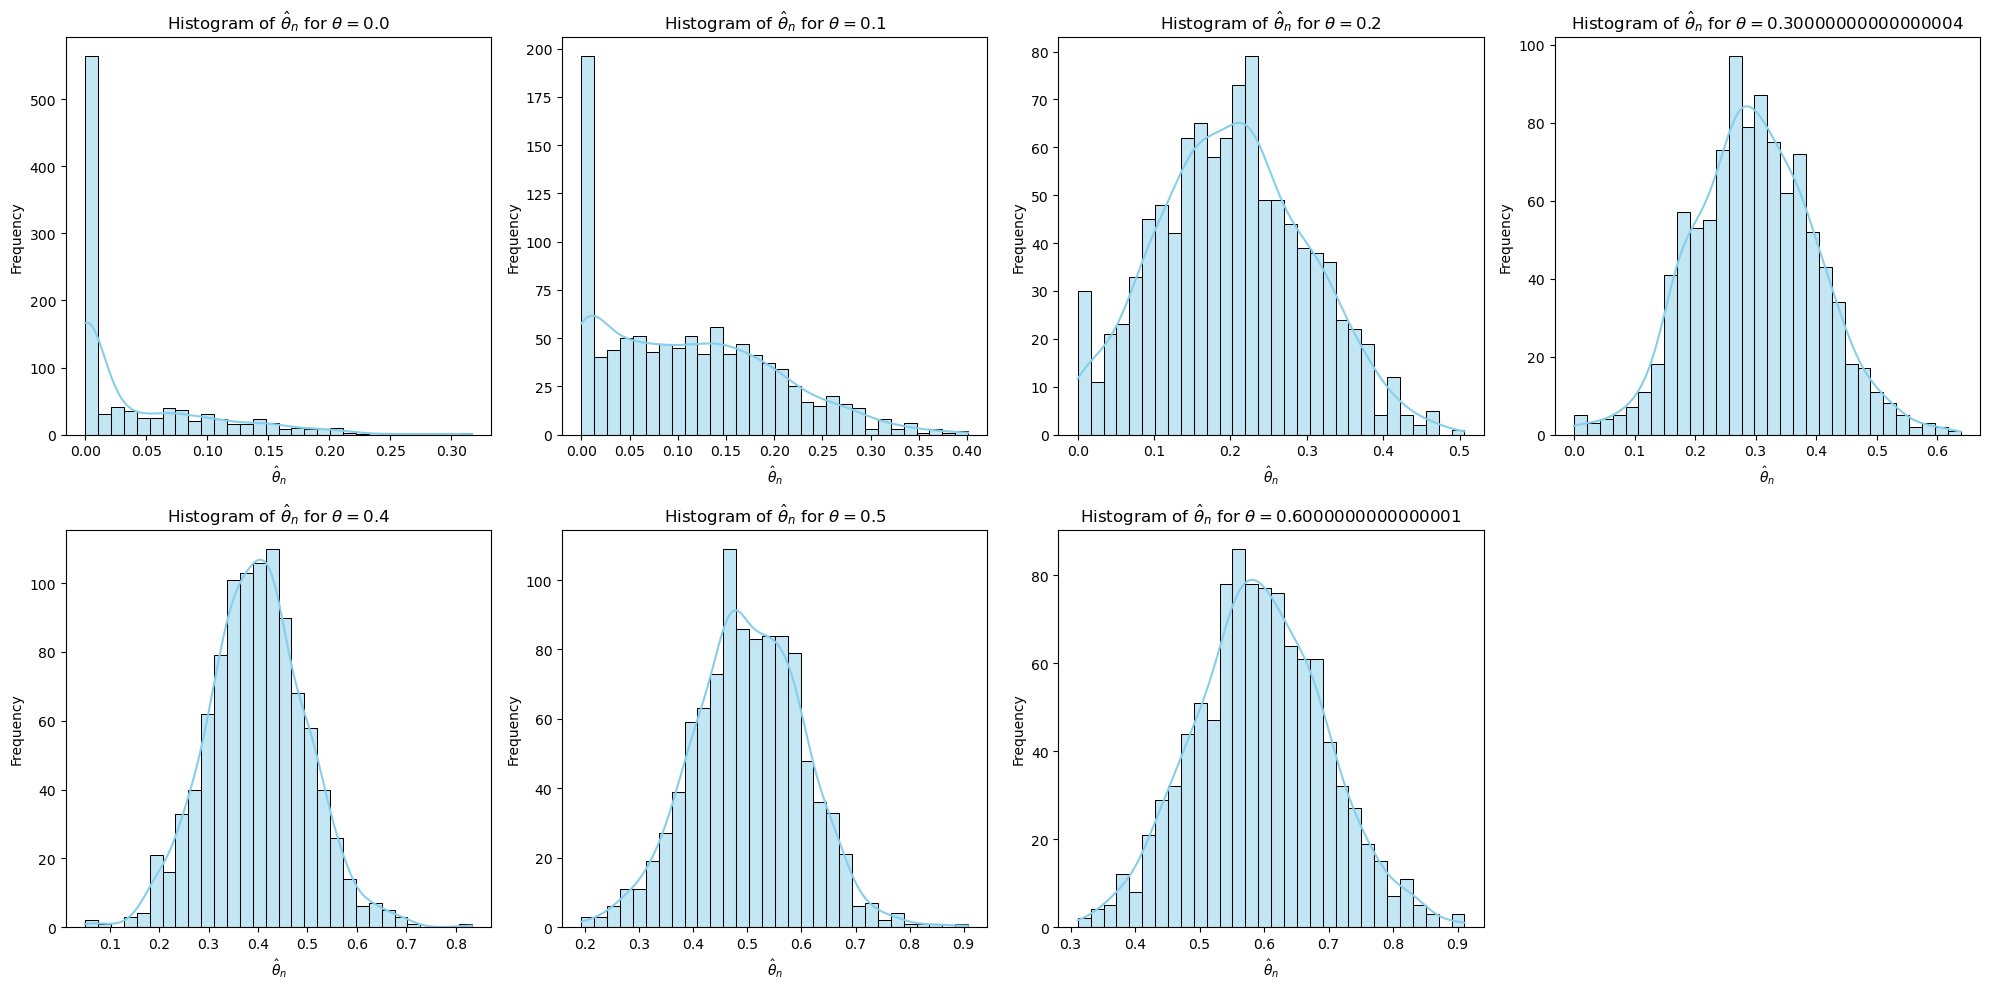

Theta = 0.0: Mean of estimates = 0.0402, Std Dev = 0.0595
Theta = 0.1: Mean of estimates = 0.1105, Std Dev = 0.0894
Theta = 0.2: Mean of estimates = 0.2028, Std Dev = 0.0983
Theta = 0.3: Mean of estimates = 0.2985, Std Dev = 0.1009
Theta = 0.4: Mean of estimates = 0.3978, Std Dev = 0.0992
Theta = 0.5: Mean of estimates = 0.5016, Std Dev = 0.1018
Theta = 0.6: Mean of estimates = 0.5938, Std Dev = 0.1007


In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters
theta = np.arange(0.0, 0.7, 0.1)  # theta values from 0 to 0.6
n = 100                           # Sample size
REP = 1000                        # Number of Monte Carlo repetitions

np.random.seed(42)  # For reproducibility

# Initialize an array to store estimates
thetahat = np.zeros((len(theta), REP))

# Monte Carlo Simulation
for b in range(REP):
    for i, th in enumerate(theta):
        # Generate new epsilon for each replication and theta
        epsilon = np.random.normal(0, 1, n)
        y = th + epsilon
        ybar = np.mean(y)
        # Compute theta_hat using the maximum likelihood estimator
        thetahat[i, b] = max(0, ybar)

# Plot histograms for each theta
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, th in enumerate(theta):
    ax = axes[i]
    sns.histplot(thetahat[i, :], kde=True, bins=30, ax=ax, color="skyblue")
    ax.set_title(f"Histogram of $\\hat{{\\theta}}_n$ for $\\theta = {th}$")
    ax.set_xlabel("$\\hat{\\theta}_n$")
    ax.set_ylabel("Frequency")

# Remove any empty subplots
for j in range(len(theta), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Print the mean and standard deviation of the estimates
for i, th in enumerate(theta):
    mean_estimate = np.mean(thetahat[i, :])
    std_estimate = np.std(thetahat[i, :])
    print(f"Theta = {th:.1f}: Mean of estimates = {mean_estimate:.4f}, Std Dev = {std_estimate:.4f}")
